## Inferring species trees with svd4tet
_ipyrad_ includes a number of analysis tools that are optimized for analysis of RAD-seq data. The program __svd4tet__ uses the algorithm described by Chifman and Kubatko (2015) to quickly infer quartet trees from large SNP alignments, and then finds the best quartet-joined supertree with the program wQMC. 

### Command-line options

In [1]:
%%bash
svd4tet -h


 ---------------------------------------------------------------------
  Analysis tools for ipyrad [v.0.3.25]
  svd4tet -- fast quartet and tree inference 
 ---------------------------------------------------------------------
usage: svd4tet [-h] [-v] [-f] [-s seq] [-j json] [-m method] [-q nquartets]
               [-b boots] [-l map_file] [-r resolve] [-n name] [-o outdir]
               [-t starting_tree] [-c cores] [-x random_seed] [-d] [--MPI]

optional arguments:
  -h, --help        show this help message and exit
  -v, --version     show program's version number and exit
  -f, --force       force overwrite of existing data
  -s seq            path to input phylip file (SNPs of full sequence file)
  -j json           load checkpointed/saved analysis from JSON file.
  -m method         method for sampling quartets (all, random, or equal)
  -q nquartets      number of quartets to sample (if not -m all)
  -b boots          number of non-parametric bootstrap replicates
  -l map_file

### What does it do differently...?

+ __bootstrapping__: svd4tet has a bootstrapping implementation that is designed to maximize SNP information across RAD-seq loci. Each quartet (sample of four taxa) one SNP shared by those taxa is randomly sampled from every locus. 


+ __heuristic sampling__: ...when all quartets cannot be sampled...

 
+ __parallelization__: ...unlimited improvement across more CPUs, very low memory.



### Calling svd4tet

In [3]:
%%bash

## call svd4tet with a snps file and an output name
svd4tet -s /home/deren/Downloads/pedicularis/newtest2_outfiles/newtest2.snps.phy \
        -l /home/deren/Downloads/pedicularis/newtest2_outfiles/newtest2.snps.map \
        -o "analysis_quartets" \
        -n "newtest" \
        -b 100 \
        -c 4 


 ---------------------------------------------------------------------
  Analysis tools for ipyrad [v.0.3.25]
  svd4tet -- fast quartet and tree inference 
 ---------------------------------------------------------------------
  loading array [13 taxa x 207148 bp]
  max unlinked SNPs per quartet: 36868
  ipyparallel setup: Local connection to 4 Engines

  inferring 715 x 3 quartet trees
  [####################] 100%  initial tree | 0:00:22 
  running 100 bootstrap replicates
  [####################] 100%  boot 1       | 0:00:01 
  [####################] 100%  boot 2       | 0:00:01 
  [####################] 100%  boot 3       | 0:00:01 
  [####################] 100%  boot 4       | 0:00:01 
  [####################] 100%  boot 5       | 0:00:01 
  [####################] 100%  boot 6       | 0:00:01 
  [####################] 100%  boot 7       | 0:00:01 
  [####################] 100%  boot 8       | 0:00:01 
  [####################] 100%  boot 9       | 0:00:01 
  [####################]

### Plot the resulting tree in R
The command below allows us to run R code in this Jupyter notebook.

Read in the unrooted tree.


Phylogenetic tree with 13 tips and 11 internal nodes.

Tip labels:
	41478_cyathophylloides, 41954_cyathophylloides, 29154_superba, 30686_cyathophylla, 32082_przewalskii, 33588_przewalskii, ...

Unrooted; includes branch lengths.


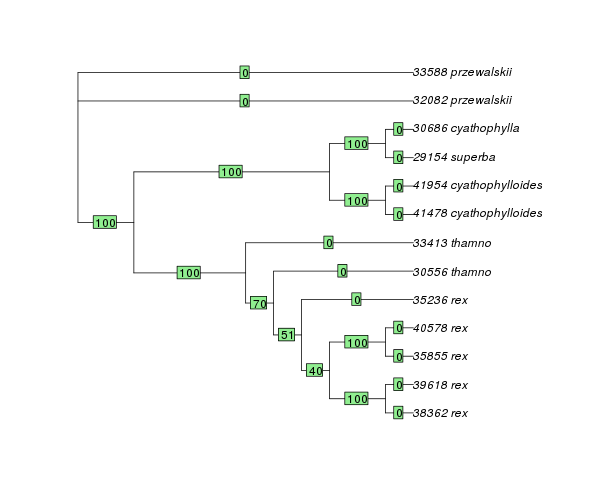

In [33]:
%%R -w 600 -h 500
library(ape)
#library(ggtree)

tre <- read.tree("/home/deren/Downloads/analysis_quartets/svd.support.tre")

## reorder rooted tree ('root')
rtre <- root(tre, c("33588_przewalskii", "32082_przewalskii"))
print(rtre)

## plot the tre
plot(rtre, use.edge.length=FALSE)
edgelabels(rtre$edge.length)

In [27]:
%%R
tre$edge.length

 [1] 100 100 100   0   0 100   0   0 100   0   0  70  51  40 100   0   0 100   0
[20]   0   0   0   0


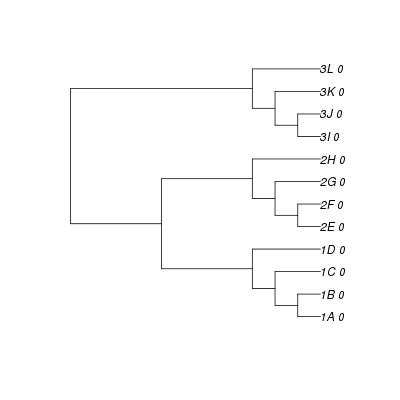

In [19]:
%%R -w 400 -h 400

tre <- read.tree("/home/deren/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.tre")

plot(tre)

In [34]:
a = "TGCAGAAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGCGTGTCTnnnnAACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTGATTATCCATAC-ACCG"

In [35]:
print a[5:]

AAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGCGTGTCTnnnnAACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTGATTATCCATAC-ACCG


In [38]:
print a[5:94]

AAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGCGTGTCT


In [37]:
print a[98:196]

AACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTGATTATCCATAC-A


In [39]:
a = "AAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGGGTGTCTnnnnAACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTAATTATCCATAC"

In [55]:
import numpy as np

m1 = np.invert([i in range(3, 10) for i in range(20)])

m2 = np.invert([i in range(26, 35) for i in range(24, 40)])

np.concatenate([m1, m2])

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True], dtype=bool)